In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from data import MESAPreProcessing, Wearable, MMASHPreProcessing
from analysis import SleepWakeAnalysis, Viewer, NonWearingDetector ,SleepBoudaryDetector,CircadianAnalysis


Imported


## MMASH DATASET


In [13]:
# MMASH form data
mmesh = '.\\data_file\\examples_mmash\\actigraph_1.csv'
preprocessed = MMASHPreProcessing(mmesh)


Loaded wearable with pid 1
Get wearables
get werables


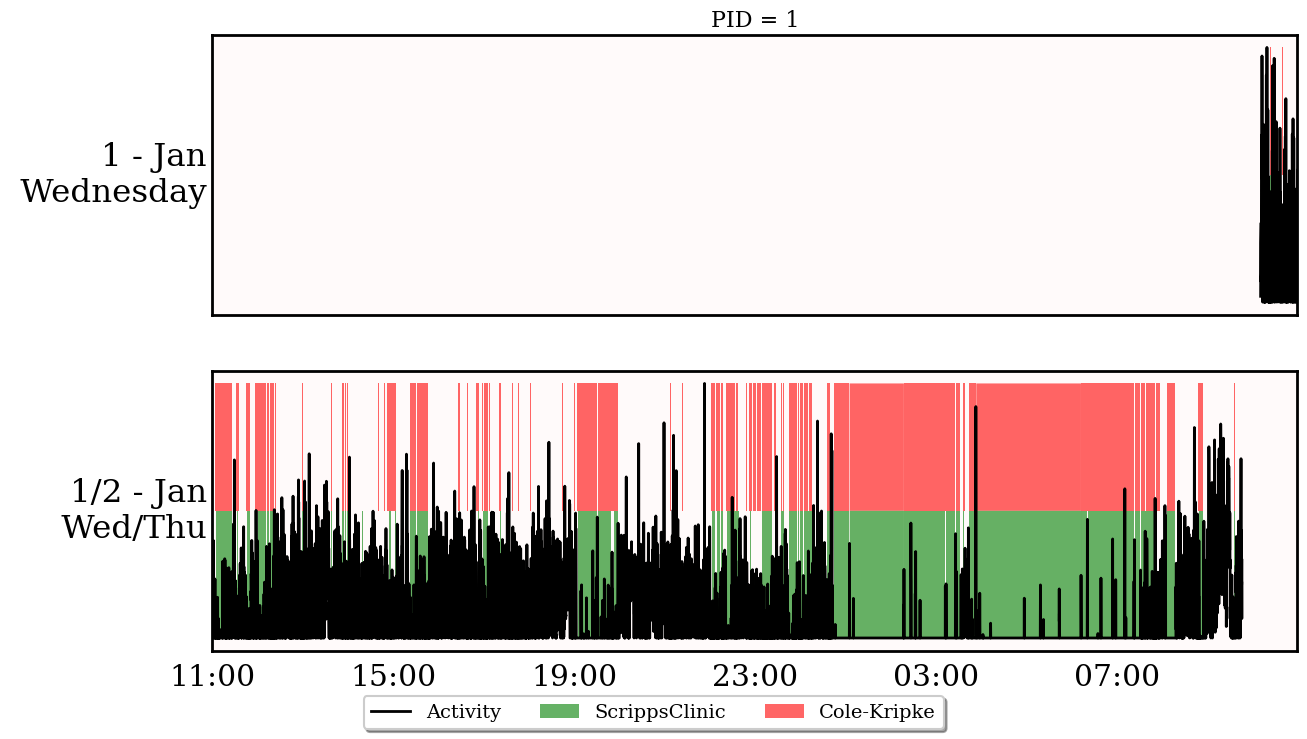

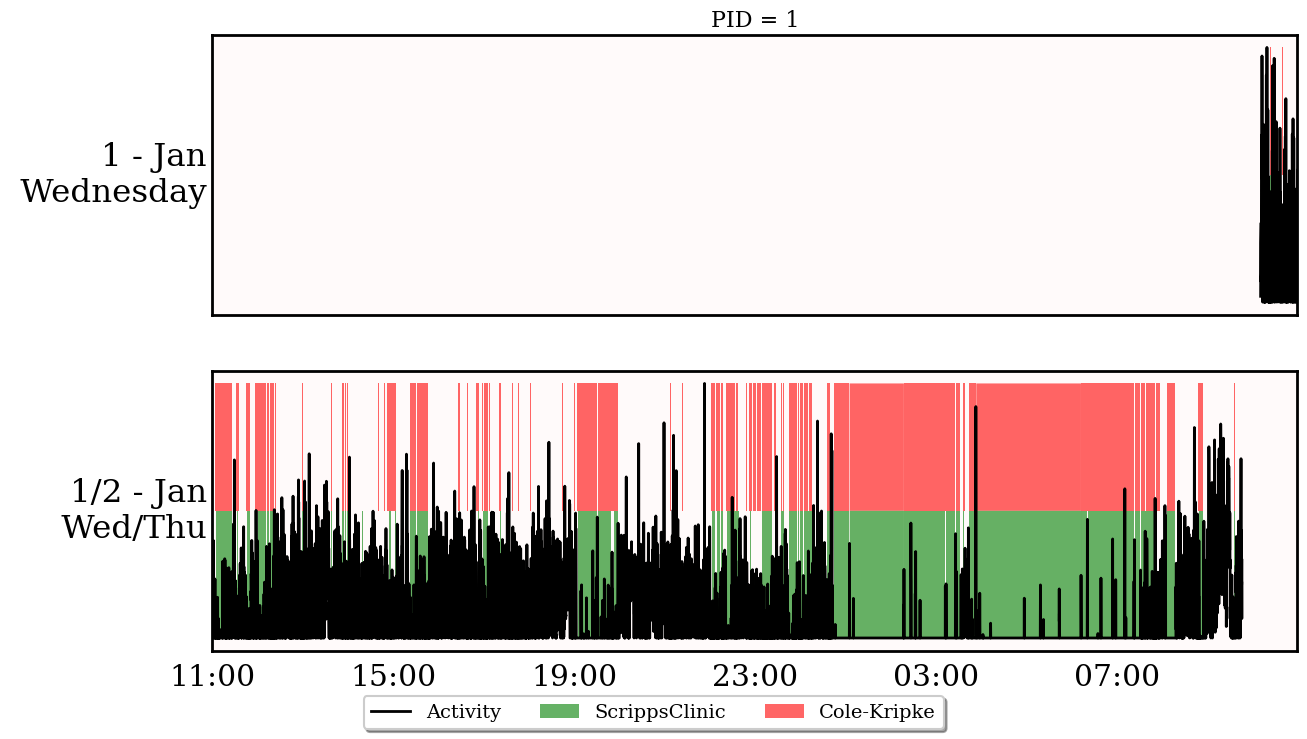

c:\Users\seungeun\Documents\Wearable\analysis\sleep_boundary_detector.py:41: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_time["hyp_sleep"] = df_time["hyp_sleep"].fillna(method='ffill').fillna(method='bfill')
c:\Users\seungeun\Documents\Wearable\analysis\sleep_boundary_detector.py:45: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_time["hyp_sleep_bin"] = df_time["hyp_sleep_bin"].rolling(window=rolling_win_in_minutes).median().fillna(
c:\Users\seungeun\Documents\Wearable\analysis\sleep_boundary_detector.py:129: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[new_start:new_end, "hyp_sleep_candidate"] = int(1)


In [55]:
preprocessed = MMASHPreProcessing(mmesh)


w = Wearable(preprocessed)
w.change_start_hour_for_experiment_day(11)
w.change_start_hour_for_experiment_day(11)

sw = SleepWakeAnalysis(w)
sw.run_sleep_algorithm("ScrippsClinic", inplace=True, rescoring='a') # runs alg and creates new col named 'ScrippsClinic'
sw.run_sleep_algorithm("Cole-Kripke", inplace=True, rescoring = 'a')   # runs alg and creates new col named 'Cole-Kripke'


v = Viewer(w)
v.view_signals(signal_categories=["activity"], signal_as_area=["ScrippsClinic", "Cole-Kripke"],
               colors={"area": ["green", "red"]}, alphas={"area": 0.6})

# Those can be removed with an algorithm like choi's.
nwd = NonWearingDetector(w)
nwd.detect_non_wear(strategy="choi")


v.view_signals(signal_categories=["activity"], signal_as_area=["ScrippsClinic", "Cole-Kripke"],
               colors={"area": ["green", "red"]}, alphas={"area": 0.6})


sb = SleepBoudaryDetector(w)
sb.detect_sleep_boundaries(strategy = 'hr')

# View results


get wearable data.
=== Running SSA ===


0it [00:00, ?it/s]

0
input: (709, 708)
U: (709, 709)
s: (708,)
V: (708, 708)
r: 708
gkList: (708, 1416)


100%|██████████| 708/708 [00:15<00:00, 46.65it/s]
c:\Users\seungeun\Documents\Wearable\analysis\circadian_analysis.py:71: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ssa['gksum' + freq] = df_gk.resample(freq).mean()
1it [00:16, 16.27s/it]
c:\Users\seungeun\Documents\Wearable\analysis\visualization.py:909: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax1.axvline(x=df.ssa['acrophase'][i],color='orange')


get werables


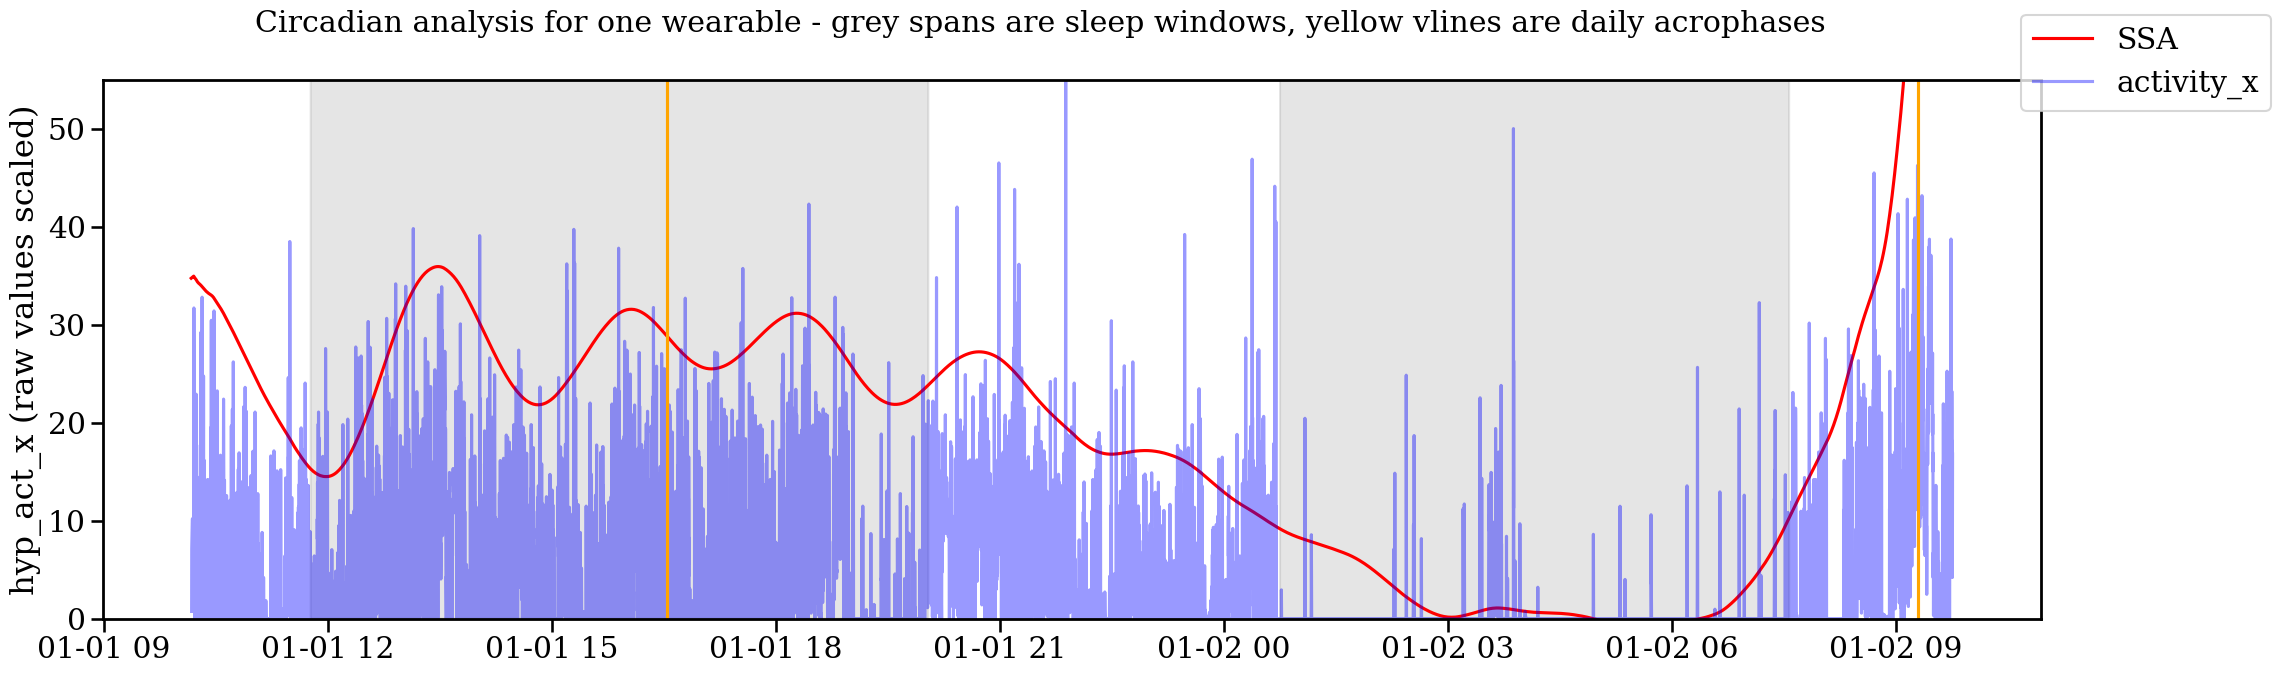

In [4]:
from analysis import CircadianAnalysis

ca = CircadianAnalysis(w)
ssa = ca.run_SSA()
v = Viewer(w)
v.view_ssa(num_sub_timeseries=4)

Loaded wearable with pid 288
Get wearables
get werables


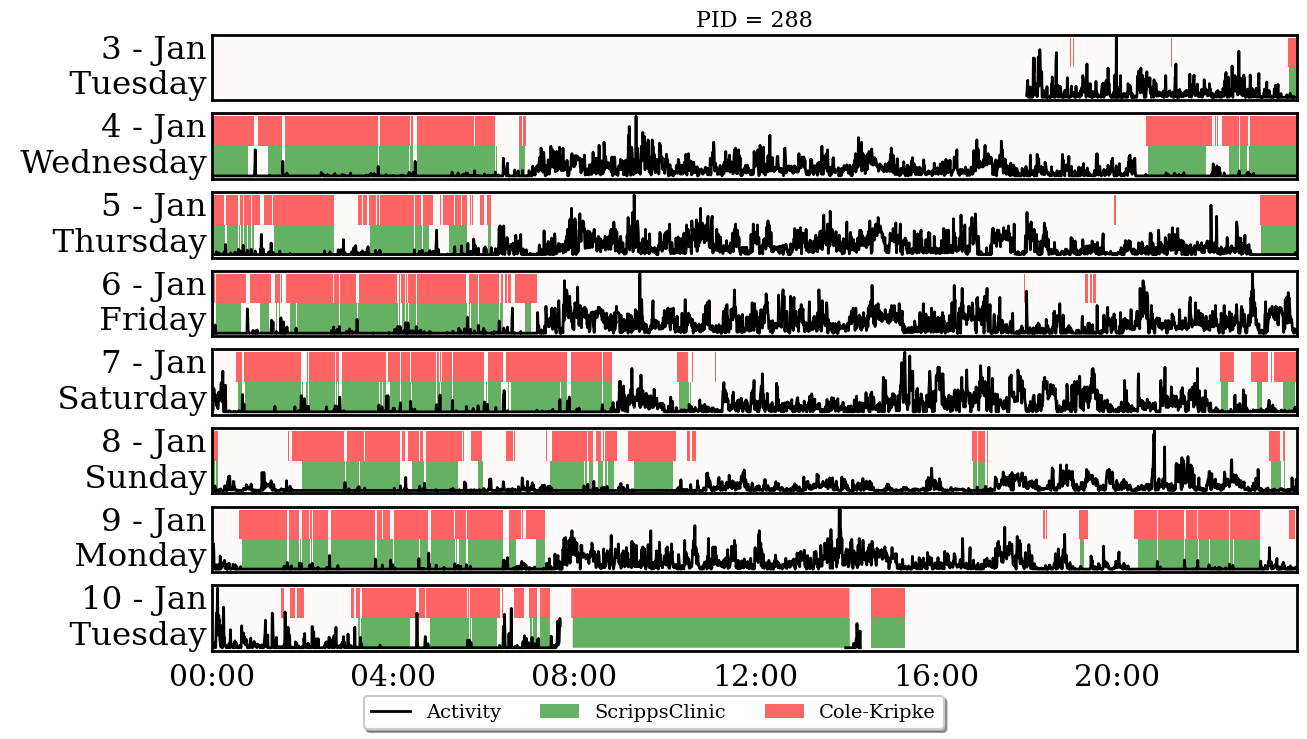

<class 'data.wearable.Wearable'>


c:\Users\seungeun\Documents\Wearable\analysis\non_wearing_detector.py:68: UserWarning: It seems pid 288 has removed their device. Filling no activity with -0.0001.
  warnings.warn(


In [32]:
# MESA form data 
mesa = '.\\data_file\\examples_mesa\\actigraphy\\mesa-sleep-0288.csv'
preprocessed = MESAPreProcessing(mesa)

w = Wearable(preprocessed)
w.change_start_hour_for_experiment_day(0)

# Sleep Wake Analysis module
sw = SleepWakeAnalysis(w)
sw.run_sleep_algorithm("ScrippsClinic", inplace=True, rescoring='a') # runs alg and creates new col named 'ScrippsClinic'
sw.run_sleep_algorithm("Cole-Kripke", inplace=True, rescoring = 'a')   # runs alg and creates new col named 'Cole-Kripke'

# View results
v = Viewer(w)
v.view_signals(signal_categories=["activity"], signal_as_area=["ScrippsClinic", "Cole-Kripke"],
               colors={"area": ["green", "red", "blue"]}, alphas={"area": 0.6})

print(type(w))

# Easily remove non-wearing epochs/days.
nwd = NonWearingDetector(w)
nwd.detect_non_wear(strategy="choi")





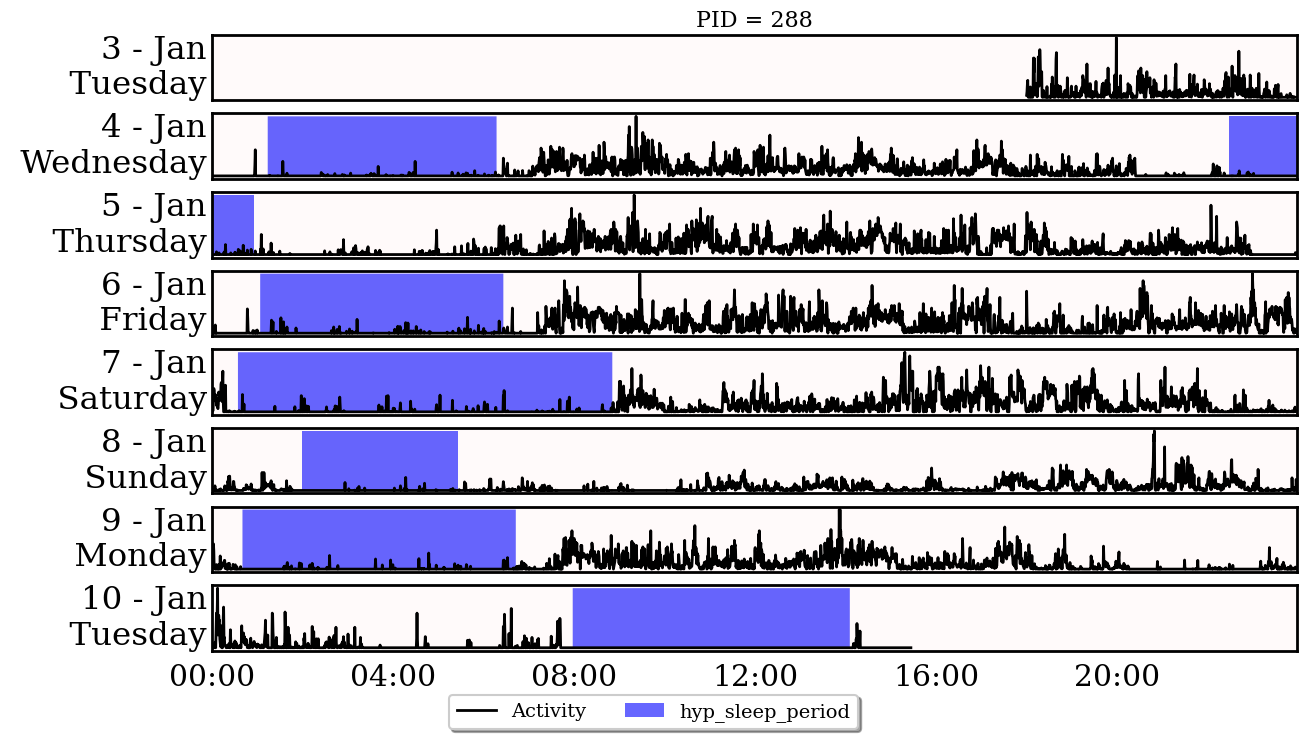

In [33]:
# Sleep Boundary module
sb = SleepBoudaryDetector(w)
sb.detect_sleep_boundaries(strategy = 'annotation', annotation_col='ScrippsClinic')

#sb.detect_sleep_boundaries(strategy = 'angle')
v.view_signals(signal_categories=["activity"], signal_as_area=["hyp_sleep_period"],
               colors={"area": ["blue"]}, alphas={"area": 0.6})


get wearable data.
=== Running SSA ===


0it [00:00, ?it/s]

0
input: (8488, 1440)
U: (8488, 8488)
s: (1440,)
V: (1440, 1440)
r: 1440
gkList: (1440, 9927)


100%|██████████| 1440/1440 [06:13<00:00,  3.86it/s]
c:\Users\seungeun\Documents\Wearable\analysis\circadian_analysis.py:71: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ssa['gksum' + freq] = df_gk.resample(freq).mean()
1it [06:49, 409.03s/it]
c:\Users\seungeun\Documents\Wearable\analysis\visualization.py:909: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax1.axvline(x=df.ssa['acrophase'][i],color='orange')


get werables


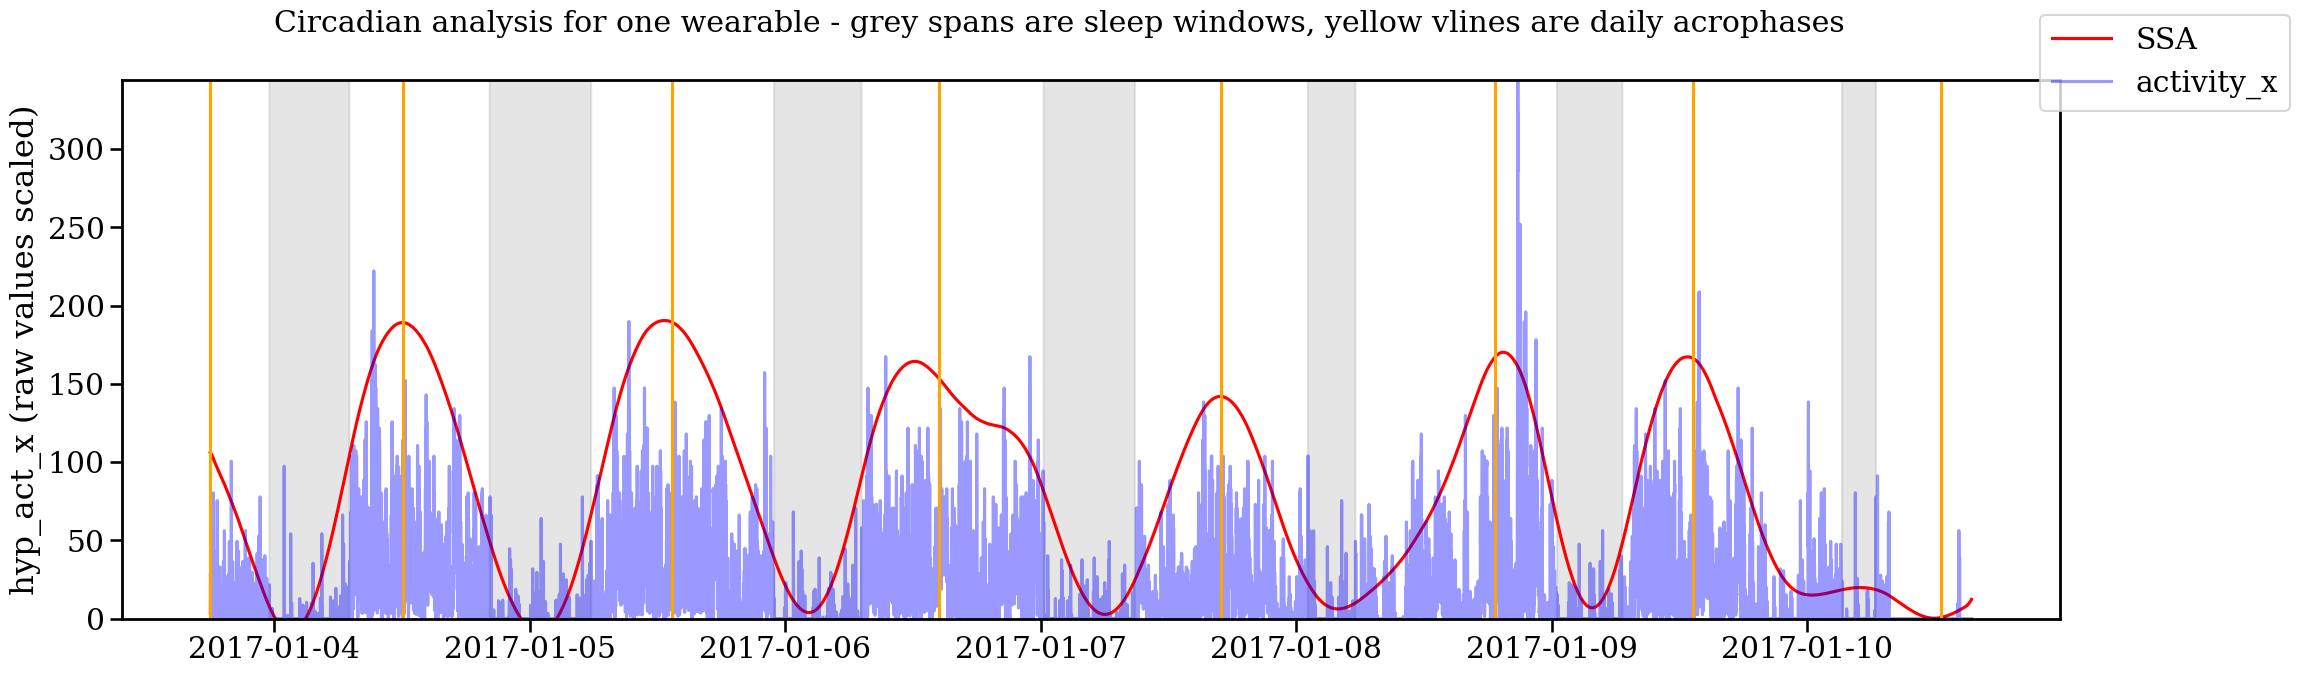

In [27]:
ca = CircadianAnalysis(w)
ssa = ca.run_SSA()
v = Viewer(w)
v.view_ssa(num_sub_timeseries=4)

In [35]:
ca = CircadianAnalysis(w)
cas = ca.run_cosinor()

get wearable data.


1it [00:00,  7.82it/s]


In [54]:
cas

p  p_reject       SNR           RSS    resid_SE  \
pid hyp_exp_day                                                               
288 0            1.016335e-02       NaN  0.144259  2.928022e+06   64.038048   
    1            5.761080e-03       NaN  0.075441  4.685236e+07  127.679852   
    2            1.110223e-16       NaN  0.189389  4.815530e+07  129.443022   
    3            1.110223e-16       NaN  0.356658  4.204598e+07  120.953616   
    4            1.110223e-16       NaN  0.321672  2.556627e+07   94.317075   
    5            1.110223e-16       NaN  0.381549  4.825167e+07  129.572484   
    6            3.607188e-03       NaN  0.077945  4.145013e+07  120.093513   
    7            1.110223e-16       NaN  0.259359  4.212076e+06   47.741618   

                         ME  period  amplitude  acrophase      mesor  \
pid hyp_exp_day                                                        
288 0            125.725390      24   4.764473   2.333395  60.843142   
    1            250.353346      24   4.207251   3.062974  72.574496   
    2            253.810551      24   3.004575  -1.056632  61.151022   
    3            237.164610      24   4.252619  -2.440316  25.702236   
    4            184.935954      24   1.795690  -0.050316   8.936710   
    5            254.064399      24   2.568976  -0.893105 -13.747534   
    6            235.478130      24   3.148126  -2.151000  58.643843   
    7             93.633177      24   1.210151  -1.547211  34.830303   

                                                    peaks  \
pid hyp_exp_day                                             
288 0                                [15.087087087087086]   
    1               [12.3003003003003, 23.59159159159159]   
    2                                 [4.036036036036036]   
    3                                  [9.32132132132132]   
    4            [0.1921921921921922, 11.723723723723724]   
    5                                [3.4114114114114114]   
    6             [8.216216216216216, 15.471471471471471]   
    7                                  [5.90990990990991]   

                                                 heights  \
pid hyp_exp_day                                            
288 0                                [65.60761490516073]   
    1             [76.78157376596573, 73.86287777944949]   
    2                                [64.15559714112291]   
    3                                [29.95485520745127]   
    4            [10.732399746406472, 9.227817713404683]   
    5                              [-11.178558132307453]   
    6             [61.79190789994283, 61.45139881571948]   
    7                                [36.04043099532926]   

                                                  troughs  \
pid hyp_exp_day                                             
288 0                                   [3.6996996996997]   
    1             [5.573573573573573, 18.546546546546548]   
    2                                [13.357357357357357]   
    3                                [22.534534534534533]   
    4               [6.63063063063063, 17.44144144144144]   
    5                                [14.222222222222221]   
    6                                 [23.87987987987988]   
    7            [13.645645645645645, 22.246246246246248]   

                                                 heights2  max_loc  period2  \
pid hyp_exp_day                                                               
288 0                                 [56.07866866518417]      314       24   
    1              [68.36741940761031, 70.51761344191777]      256       24   
    2                                  [58.1464982261511]       84       24   
    3                                [21.449637774275796]      194       24   
    4              [7.738638217706974, 7.141020299177407]        4       24   
    5                               [-16.316510186072172]       71       24   
    6                                 [55.49577661738721]    